In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import joblib

In [67]:
# Load dataset
data = pd.read_csv("FuelConsumption.csv")  # Use your new dataset file name

In [68]:
# Drop columns that won't be used
data.drop(columns=["MODELYEAR", "MAKE", "MODEL"], inplace=True)

In [69]:
# Fill or drop missing values
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [70]:
# Encode categorical data
encoder = LabelEncoder()
categorical_columns = ["VEHICLECLASS", "TRANSMISSION", "FUELTYPE"]
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])
    print(
        f"{column} mapping: {dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))}"
    )

VEHICLECLASS mapping: {'COMPACT': 0, 'FULL-SIZE': 1, 'MID-SIZE': 2, 'MINICOMPACT': 3, 'MINIVAN': 4, 'PICKUP TRUCK - SMALL': 5, 'PICKUP TRUCK - STANDARD': 6, 'SPECIAL PURPOSE VEHICLE': 7, 'STATION WAGON - MID-SIZE': 8, 'STATION WAGON - SMALL': 9, 'SUBCOMPACT': 10, 'SUV - SMALL': 11, 'SUV - STANDARD': 12, 'TWO-SEATER': 13, 'VAN - CARGO': 14, 'VAN - PASSENGER': 15}
TRANSMISSION mapping: {'A4': 0, 'A5': 1, 'A6': 2, 'A7': 3, 'A8': 4, 'A9': 5, 'AM5': 6, 'AM6': 7, 'AM7': 8, 'AS4': 9, 'AS5': 10, 'AS6': 11, 'AS7': 12, 'AS8': 13, 'AS9': 14, 'AV': 15, 'AV6': 16, 'AV7': 17, 'AV8': 18, 'M5': 19, 'M6': 20, 'M7': 21}
FUELTYPE mapping: {'D': 0, 'E': 1, 'X': 2, 'Z': 3}


In [71]:
# Feature scaling
scaler = StandardScaler()
numerical_columns = [
    col for col in data.columns if data[col].dtype in [np.float64, np.int64]
]
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [72]:
# Prepare data for training
x = data.drop(columns="CO2EMISSIONS")
y = data["CO2EMISSIONS"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=42
)

In [73]:
# Model training using LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [74]:
# Evaluation
mean_abl_err = mean_absolute_error(y_test, y_pred)
mean_sq_err = np.sqrt(mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mean_abl_err}")
print(f"Root Mean Squared Error: {mean_sq_err}")
print(f"R^2 Score: {r2 * 100:.2f}%")

Mean Absolute Error: 0.21624777240519522
Root Mean Squared Error: 0.4650244858125163
R^2 Score: 88.95%


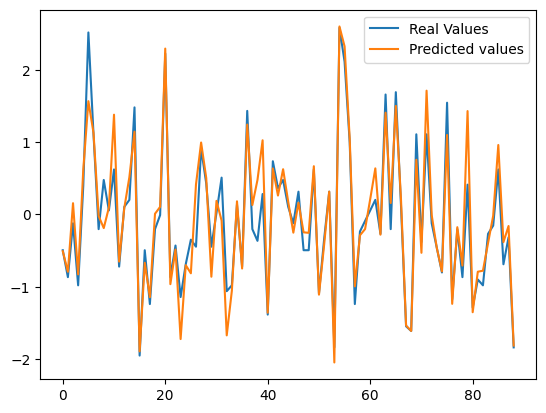

In [75]:
# Plotting
plt.plot(y_test.values.flatten(), label="Real Values")
plt.plot(y_pred, label="Predicted values")
plt.legend()
plt.show()


In [76]:


# Save the model
joblib.dump(model, "vehicle_co2_emission_model.joblib")

['vehicle_co2_emission_model.joblib']